# Курсовая: Техническая механика
### Расчет червячной передачи

In [806]:
from math import pi, atan, degrees, cos, tan, radians

def degrees_to_radians(degrees, minutes=0):
    total_degrees = degrees + minutes / 60
    
    # Переводим градусы в радианы
    return radians(total_degrees)


In [807]:
# Частота вращения выходного вала редуктора
n_out = 59

### Выбор ЭД

In [808]:
# КПД общий
# КПД передачи = 0.8 (таблица 1.1)
kpd_m = 0.98
kpd_m * 0.8


0.784

In [809]:
# Мощность ЭД
0.9 / 0.784


1.1479591836734693

In [810]:
# Диапазон частот
print(f"{59*15} ... {59*30}")


885 ... 1770


***
##### Выбираю ЭД
4А80В4У3
(3 - Чернавский стр.26)
- Частота оборотов: 1500 Об/мин
- Мощность: 1500 Вт
- Скольжение: 5.8
(3 - Чернавский стр.521, 4- Дунаев стр.457)
- Диаметр вала: 22 мм

In [811]:
# Диаметр вала электродвигателя
d_ed= 22
# Фактическая частота вращения
n_fact = 1500 * (100 - 5.8) / 100
print(n_fact)

1413.0


In [812]:
# Передаточное число редуктора
print(f"{n_fact} / {n_out} = {n_fact/n_out:.2f}")


1413.0 / 59 = 23.95


In [813]:
# Принимаю стандартное значение передаточного числа редуктора по таблице 3.2
u_p = 25

***
### Определение кинематических и силовых параметров для каждого вала
***
#### Быстроходный вал

In [814]:
# Частота оборотов
n_fact

1413.0

In [815]:
# Угловая скорость
w1 = pi * n_fact / 30
print(f"{w1:.3f}")

147.969


In [816]:
# Мощность на входном валу после муфты
P1 = 1500 * 0.98
print(P1)

1470.0


In [817]:
# Момент на входном валу, Н*мм
T1 = P1 * 1000 / w1
print(T1)

9934.512371341238


***
#### Тихоходный вал

In [818]:
# Частота оборотов
n1 = n_fact
n2 = n1 / u_p
print(n2)

56.52


In [819]:
# Угловая скорость
w2 = pi * n2 / 30
print(w2)

5.91876055936317


In [820]:
# Мощность на выходном валу
# 0.8 - кпд для червячного редуктора (таблица 1.1)
P2 = P1 * 0.8
print(P2)

1176.0


In [821]:
# Вращающий момент
T2 = P2 * 1000 / w2
print(T2)

198690.24742682476


##### Моменты для дальнейших расчетов

In [822]:
# Принимаю моменты для расчетов, Н*мм
T1 = 9900
T2 = 198000

***
### Выбор материалов и допускаемых напряжений 

In [823]:
# Скорость скольжения
v_s = 4.5 * 10 ** (-4) * n1 * (T2 / 1000) ** (1/3)
print(v_s)

3.706036899045438


***
#### **Выбираю материал для червячного колеса**
Согласно таблице 3.1 стр.15

Бр А9ЖЗЛ

$σ_т = 200$

$σ_в = 400$

$σ_H = 300 - 25v_s$

$σ_F = 0,25σ_т+0,08σ_в$
***
$σ_H$

In [824]:
po_h = 300 - 25 * v_s
print(f"300 - 25*{v_s:.2f} = {300 - 25*v_s:.1f}")

300 - 25*3.71 = 207.3


$σ_F$

In [825]:
po_f = 0.25*200 + 0.08*400
print(po_f)

82.0


***
#### Проектный расчет червячной передачи по контактным напряжениям

In [826]:
# Согласно таблице 3.2 выбираю стандартное передаточное отношение
# Вычисляю число зубьев колеса
z1 = 2
z2 = z1 * u_p
print(z2)

50


In [827]:
# Определяю межосевое расстояние
K_n = 1.1
q = 12.5
T2_m = T2 / 1000
a_w = (z2/q + 1) * ((5400/(z2/q*po_h)) ** 2 * T2_m * K_n) ** (1/3)
print(f"({z2}/{q} + 1) * ((5400/({z2}/{q}*{po_h:.0f})) ** 2 * {T2_m} * {K_n}) ** (1/3) = {(z2/q + 1) * ((5400/(z2/q*po_h)) ** 2 * T2_m * K_n) ** (1/3):0f}")

# Выбираю стандартное значение a_w = 125 мм
a_w = 125

(50/12.5 + 1) * ((5400/(50/12.5*207)) ** 2 * 198.0 * 1.1) ** (1/3) = 104.892331


In [828]:
# Определяю величину осевого модуля для стандартного a_w
m = 2*a_w/(q + z2)
print(m)

4.0


***
#### Выбираю стандартные значения из таблицы 3.3

$a_w = 125$ мм

$m = 4$ мм

$q = 12,5$

$z_2:z_1 = 50:2$

***
#### Определяю геометрические параметры червяка

In [829]:
d1 = d_1b = q * m
print(d1)

50.0


In [830]:
da1 = d1 + 2 * m
print(da1)

58.0


In [831]:
df1 = d1 - 2.4*m
print(df1)

40.4


In [832]:
# Длина нарезанной части червяка
b1 = (11 + 0.06*z2)*m
print(b1)

56.0


***
#### Определяю геометрические параметры колеса 

In [833]:
d2 = m * z2
print(d2)

200.0


In [834]:
da2 = d2 + 2*m
print(da2)

208.0


In [835]:
df2 = d2 - 2.4*m
print(df2)

190.4


In [836]:
# Ширина зубчатого венца червячного колеса
b2 = 0.75*da1
print(b2)

43.5


In [837]:
# Проверяю выбранное значение v_s
tg_y = z1/q
print(tg_y)

0.16


In [838]:
y = atan(tg_y)
print(y)

0.1586552621864014


In [839]:
# Угол в градусах
deg_y = degrees(y)
print(deg_y)

9.090276920822323


***
#### Проверочный рассчет по контактным напряжениям

In [840]:
# Проверяю условие прочности выбранной стандартной передачи
temp = (5400/(z2/q))*(((z2/q+1)/a_w)**3*T2_m*K_n)**(0.5)
print(f"(5400/({z2}/{q}))*((({z2}/{q}+1)/{a_w})**3*{T2_m}*{K_n})**(0.5) = {(5400/(z2/q))*(((z2/q+1)/a_w)**3*T2_m*K_n)**(0.5)}")

(5400/(50/12.5))*(((50/12.5+1)/125)**3*198.0*1.1)**(0.5) = 159.38692543618504


##### Прочность по контрольным напряжениям обеспечена так как 159 МПа < 206 МПа 

***
#### Проверка прочности зубьев червячного венца на изгиб

In [841]:
# Окружная сила на колесе
Ft2 = 2 * T2/d2
print(f"2 * {T2}/{d2} = {2 * T2/d2}")

2 * 198000/200.0 = 1980.0


In [842]:
# Окружная сила на червяке
Ft1 = 2 * T1/d1
print(f"2 * {T1}/{d1} = {2 * T1/d1}")

2 * 9900/50.0 = 396.0


In [843]:
# Определение коэффициента формы зуба из таблицы 3.7
z_v = z2/cos(y) ** 3
print(f"{z2}/cos({y:.4f}) ** 3 = {z2/cos(y) ** 3:.1f}")

50/cos(0.1587) ** 3 = 51.9


##### Принимаю форму зуба из таблицы 3.7
$Y_F = 45$

Значения коэффициентов расчетной нагрузки $K_н$ и $K_F$ принимаются одинаковыми (стр.18) = 1

In [844]:
Y_F = 1.45
K_F = 1
po_ff = 0.7*Y_F*Ft2*K_F/(b2*m)
print(f"0.7*{Y_F}*{Ft2}*{K_F}/({b2}*{m}) = {0.7*Y_F*Ft2*K_F/(b2*m):.2f}")
print(f"{po_ff:.1f} < {po_f}")
print("Прочность по напряжениям изгиба обеспечена")

0.7*1.45*1980.0*1/(43.5*4.0) = 11.55
11.5 < 82.0
Прочность по напряжениям изгиба обеспечена


***
##### Уточняю КПД червячной передачи


In [845]:
kpd_b = tan(y)/tan(y + degrees_to_radians(1, 26))
print(kpd_b)

0.8613018256599354


##### Общий КПД
КПД = КПДп * КПДм

In [846]:
kpd_sum = kpd_b * kpd_m
print(f"{kpd_b:.3f} * {kpd_m} = {kpd_b * kpd_m:.3f}")
# print(kpd_sum)

0.861 * 0.98 = 0.844


##### Тепловой расчет


In [847]:
# FF = P1*(1 - kpd_sum)*A

***
### Расчет валов

#### Расчет выполняю по таблице 4.1
##### Быстроходный вал (червяк)

In [848]:
# 1 ступень под муфту
d_1st = 1.2 * d_ed
print(f"1.2 * {d_ed} = {1.2 * d_ed}")
d_1st = 24
print(d_1st)

1.2 * 22 = 26.4
24


In [849]:
# 2 ступень под уплотнение крышки с отверстием и подшипник
t = 2 # Таблица 4.2
d_2st = d_1st + 2 * t
print(d_2st)
d_2st = 30
print(d_2st)


28
30


In [850]:
# 3 ступень под шестерню
r = 1 # таблица 4.2
d_3st = d_2st + 3.2 * r
print(d_3st)
d_3st = 34
print(d_3st)

33.2
34


In [851]:
# 4 ступень
d_4st = d_2st
print(d_4st)

30


##### Выходной вал (червячное колесо)

In [852]:
# Выходной вал под муфту: 1-я ступень
d_1st_2 = (T2/(0.2 * 40)) ** (1/3)
print(d_1st_2)
d_1st_2 = 30
print(d_1st_2)

29.142383416257275
30


In [853]:
# 2-я ступень
t = 2.5
d_2st_2 = d_1st_2 + 2 * t
print(d_2st_2)

35.0


In [854]:
# 3-я ступень
d_3st_2 = d_2st_2 + 3.2 * r
print(d_3st_2)
d_3st_2 = 40
print(d_3st_2)

38.2
40


In [855]:
# 4-я ступень
d_4st_2 = d_2st_2
print(d_4st_2)

35.0


***
##### Конструирование червячной передачи стр.20

In [856]:
# Наибольший диаметр червячного колеса
d_am2 = da2 + 6*m/(z1 + 2*z2)
print(f"{da2} + 6*{m}/({z1} + 2*{z2}) = {da2 + 6*m/(z1 + 2*z2)}")
# print(d_am2)

208.0 + 6*4.0/(2 + 2*50) = 208.23529411764707


In [857]:
d_st = 1.8 * d_3st_2
print(f"1.8 * {d_3st_2} = {1.8 * d_3st_2}")

1.8 * 40 = 72.0


In [858]:
l_st = 1.7 * d_3st_2
print(l_st)

68.0


In [859]:
po_1 = po_2 = 2 * m
print(po_1)

8.0


In [860]:
C = 0.25 * b2
print(C)

10.875


In [861]:
# d винта
d_vint = 1.4*m
print(d_vint)

5.6


In [862]:
# l винта
l_vint = 0.4*b2
print(l_vint)

17.400000000000002


In [863]:
f = 0.2*d_vint
print(f)

1.1199999999999999


##### Параметры ступеней валов и подшипников

In [864]:
from IPython.display import Markdown

l_1st = 50
l_2st = 50
l_3st = 240
l_4st = 50

l_1st_2 = 50
l_2st_2 = 50
l_3st_2 = 90
l_4st_2 = 50

Markdown(f"""
##### Быстроходный вал
| d1 / l1 | d2 / l2 | d3 / l3 | d4 / l4 |
|-------|------|------|------|
| {d_1st} / {l_1st} | {d_2st} / {l_2st} | {d_3st} / {l_3st} | {d_4st} / {l_4st}|

###### Подшипники для быстроходного вала
| Обозначение | $dxDxB(T)$ | $Cr, кН$ | $C_0, кН$ | $α°$ |
|------|-------|------|------|------|
| 7606 | 30х72х29х29 | 63 | 51 | - |
***
##### Тихоходный вал
| d1 / l1 | d2 / l2 | d3 / l3 | d4 / l4 |
|-------|------|------|------|
| {d_1st_2} / {l_1st_2} | {d_2st_2} / {l_2st_2} | {d_3st_2} / {l_3st_2} | {d_4st_2} / {l_4st_2}|

###### Подшипники для тихоходного вала
| Обозначение | $dxDxB(T)$ | $Cr, кН$ | $C_0, кН$ | $α°$ |
|------|-------|------|------|------|
| 46207 | 35х72х17 | 24 | 18 | 12 |
***

""")



##### Быстроходный вал
| d1 / l1 | d2 / l2 | d3 / l3 | d4 / l4 |
|-------|------|------|------|
| 24 / 50 | 30 / 50 | 34 / 240 | 30 / 50|

###### Подшипники для быстроходного вала
| Обозначение | $dxDxB(T)$ | $Cr, кН$ | $C_0, кН$ | $α°$ |
|------|-------|------|------|------|
| 7606 | 30х72х29х29 | 63 | 51 | - |
***
##### Тихоходный вал
| d1 / l1 | d2 / l2 | d3 / l3 | d4 / l4 |
|-------|------|------|------|
| 30 / 50 | 35.0 / 50 | 40 / 90 | 35.0 / 50|

###### Подшипники для тихоходного вала
| Обозначение | $dxDxB(T)$ | $Cr, кН$ | $C_0, кН$ | $α°$ |
|------|-------|------|------|------|
| 46207 | 35х72х17 | 24 | 18 | 12 |
***



### Выбор шпонок
Шпонки выбираю по таб. 4.8 стр 23


In [865]:
# Быстроходный вал
# Проверяю шпонку на смятие
b_sh_b = 8
h_sh_b = 7
l_rb = 37
t1_b = 4
p_sm = 2 * T1/(d_1st*l_rb*(h_sh_b - t1_b))
print(f"2 * {T1}/({d_1st}*{l_rb}*({h_sh_b} - {t1_b})) = {2 * T1/(d_1st*l_rb*(h_sh_b - t1_b))}")

2 * 9900/(24*37*(7 - 4)) = 7.4324324324324325


In [866]:
# Тихоходный вал
# Проверяю шпонку на смятие
b_sh_t = 14
h_sh_t = 9
l_rt = 66
t1_t = 5.5
p_sm = 2 * T2/(d_1st*l_rt*(h_sh_t - t1_t))
print(f"2 * {T2}/({d_1st}*{l_rt}*({h_sh_t} - {t1_t})) = {2 * T2/(d_1st*l_rt*(h_sh_t - t1_t))}")

2 * 198000/(24*66*(9 - 5.5)) = 71.42857142857143


***
### Определение сил в зацеплении и консольных сил от муфт
табл.4.10
***

In [867]:
# Окружная сила на червяке
print(f"2*{T1}/{d1} = {2*T1/d1}")
print("Ft1")

2*9900/50.0 = 396.0
Ft1


In [868]:
# Окружная сила на колесе
print(f"2*{T2}/{d2} = {2*T2/d2}")
print("Ft2")


2*198000/200.0 = 1980.0
Ft2


In [869]:
# Радиальная сила на колесе и на червяке
Fr2 = Ft2*tan(radians(20))
print(Fr2)
Fr1 = Fr2 = 720
print(Fr2)

720.6610638470806
720


In [870]:
# Осевая сила на червяке
Fa1 = Ft2
print(Fa1)

1980.0


In [871]:
# Осевая сила на колесе
Fa2 = Ft1
print(Fa2)

396.0


In [872]:
# Сила на муфте (быстроходный вал)
Fm1 = 4*(T1) ** 0.5
print(Fm1)
Fm1 = 398
print(Fm1)

397.994974842648
398


***
# Реакции и эпюры

***
### Расчет быстроходного вала

In [873]:
# Расчет быстроходного вала
def calc_b():

    # Списки для построения эпюр
    lst_x1 = [0]
    lst_M1 = [0]
    lst_x2 = [0]
    lst_M2 = [0]

    # Червяк: длины, мм
    l1 = l_1st
    l2 = l_2st
    l3 = l_3st
    l4 = l_4st
    d1 = d_1b

    # Участки, мм
    a = l4/2 + l3/2
    b = a
    c = l2/2
    d = d1/2

    # Силы, Н
    Ft = Ft1
    Fr = Fr1
    Fa = Fa1
    Fm = Fm1

    #----------------------------------------
    # Вертикальная плоскость: XY

    #-----------1. Реакции--------------------
    # Моменты: положительно = против часовой стрелки

    # ∑M(A) = 0
    # -Fr*a - Fa*d + Rb*(a + b) = 0
    Rb = (Fr*a + Fa*d)/(a + b)

    # ∑M(B) = 0
    # -Ra*(a + b) + Fr*b - Fa*d = 0
    Ra = (Fr*b - Fa*d)/(a + b)

    # Проверка ось Y
    # Ra + Rb - Fr = 0
    assert Ra + Rb - Fr == 0, 'Сумма сил должна быть равна нулю'

    # Вывод результата
    print("\n1.Расчет реакции опор")
    print("Вертикальная плоскость: XY")
    print(f"Момент Fa*d = {Fa*d} Н·мм")
    print("Ось Y")
    print(f"Ra = {Ra:.3f}")
    print(f"Rb = {Rb:.3f}\n")


    #-------------2. Эпюры--------------------
    # Силы: положительно = балка крутится
    # по часовой стрелке
    #
    # Моменты: положительно = балка хочет изогнуться
    # вверх

    # 1.Участок 0 ≤ x ≤ a
    # x = a
    Ma = Ra * a

    # Записываю результат
    lst_x1 += [a]
    lst_M1 += [Ma]

    # Вывод результата
    print("\n2.Построение эпюр")
    print("Вертикальная плоскость: XY")
    print("1.Участок 0 ≤ x ≤ a")
    print("x = 0: Миy = 0")
    print(f"x = a: Миy = {Ma:.1f}\n")


    # 2.Участок a ≤ x ≤ (a + b)
    # x = a
    Ma = Ra * a + Fa * d
    # x = a + b
    Mb = Ra * (a + b) + Fa * d - Fr * b

    # Записываю результат
    lst_x1 += [a, a + b, a + b + c]
    lst_M1 += [Ma, Mb, 0]

    # Вывод результата
    print("2.Участок a ≤ x ≤ (a + b)")
    print(f"x = a: Миy = {Ma:.1f}")
    print(f"x = a+b: Миy = {Mb:.1f}\n")
    print("--------------------------------------------------\n")


    #----------------------------------------
    # Горизонтальная плоскость: XZ

    #-----------1. Реакции--------------------
    # Моменты: положительно = против часовой стрелки

    # ∑M(A) = 0
    # Ft*a - Rb*(a + b) - Fm*(a + b + c) = 0
    Rb = (Ft*a - Fm*(a + b + c))/(a + b)

    # ∑M(B) = 0
    # Ra*(a + b) - Ft*b - Fm*c = 0
    Ra = (Ft*b + Fm*c)/(a + b)

    # Проверка ось Z
    # Ra - Ft + Rb + Fm = 0
    assert Ra - Ft + Rb + Fm == 0 , 'Сумма сил должна быть равна нулю'

    # Вывод результата
    print("1.Расчет реакции опор")
    print("Горизонтальная плоскость: XZ")
    print("Ось Z")
    print(f"Ra = {Ra:.3f}")
    print(f"Rb = {Rb:.3f}\n")


    #-------------2. Эпюры--------------------
    # Силы: положительно = балка крутится
    # по часовой стрелке
    #
    # Моменты: положительно = балка хочет изогнуться
    # вверх

    # 1.Участок 0 ≤ x ≤ a
    # x = a
    Ma = -Ra * a

    # Записываю результат
    lst_x2 += [a]
    lst_M2 += [Ma]

    # Вывод результата
    print("\n2.Построение эпюр")
    print("Горизонтальная плоскость: XZ\n")
    print("1.Участок 0 ≤ x ≤ a")
    print("x = 0: Миy = 0")
    print(f"x = a: Миy = {Ma:.1f}\n")

    # 2.Участок a ≤ x ≤ (a + b)
    # x = a
    Ma = -Ra * a
    # x = a + b
    Mb = -Ra * (a + b) + Ft * b

    # Записываю результат
    lst_x2 += [a, a + b]
    lst_M2 += [Ma, Mb]

    # Вывод результата
    print("2.Участок a ≤ x ≤ (a + b)")
    print(f"x = a: Миy = {Ma:.1f}")
    print(f"x = a+b: Миy = {Mb:.1f}\n")

    # 3.Участок (a + b) ≤ x ≤ (a + b + c)
    # x = a + b
    Mb = -Ra * (a + b) + Ft * b
    # x = a + b + c
    Mc = -Ra * (a + b + c) + Ft * (b + c) - Rb * c

    # Записываю результат
    lst_x2 += [a + b, a + b + c]
    lst_M2 += [Mb, Mc]

    # Вывод результата
    print("3.Участок (a + b) ≤ x ≤ (a + b + c)")
    print(f"x = b: Миy = {Mb:.1f}")
    print(f"x = a+b+c: Миy = {Mc:.1f}\n")

    return (lst_x1, lst_M1), (lst_x2, lst_M2)

resultY, resultX = calc_b()


1.Расчет реакции опор
Вертикальная плоскость: XY
Момент Fa*d = 49500.0 Н·мм
Ось Y
Ra = 189.310
Rb = 530.690


2.Построение эпюр
Вертикальная плоскость: XY
1.Участок 0 ≤ x ≤ a
x = 0: Миy = 0
x = a: Миy = 27450.0

2.Участок a ≤ x ≤ (a + b)
x = a: Миy = 76950.0
x = a+b: Миy = 0.0

--------------------------------------------------

1.Расчет реакции опор
Горизонтальная плоскость: XZ
Ось Z
Ra = 232.310
Rb = -234.310


2.Построение эпюр
Горизонтальная плоскость: XZ

1.Участок 0 ≤ x ≤ a
x = 0: Миy = 0
x = a: Миy = -33685.0

2.Участок a ≤ x ≤ (a + b)
x = a: Миy = -33685.0
x = a+b: Миy = -9950.0

3.Участок (a + b) ≤ x ≤ (a + b + c)
x = b: Миy = -9950.0
x = a+b+c: Миy = -0.0



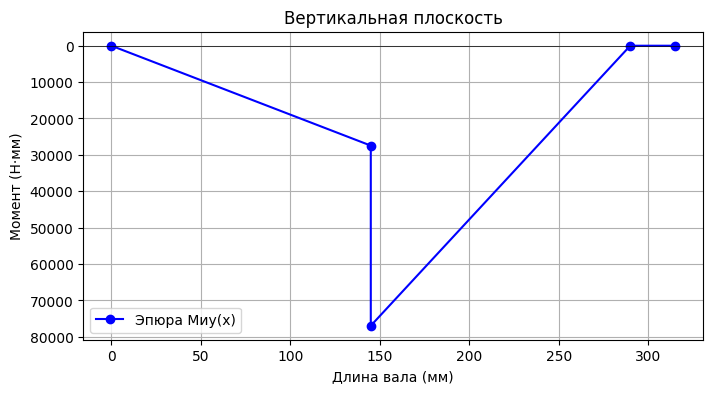

In [874]:
import matplotlib.pyplot as plt

x, M = resultY

plt.figure(figsize=(8, 4))
plt.plot(x, M, marker='o', linestyle='-', color='blue', label='Эпюра Mиy(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Длина вала (мм)')
plt.ylabel('Момент (Н·мм)')
plt.title('Вертикальная плоскость')
plt.grid(True)
plt.legend()

# Инвертируем ось Y
plt.gca().invert_yaxis()
plt.show()



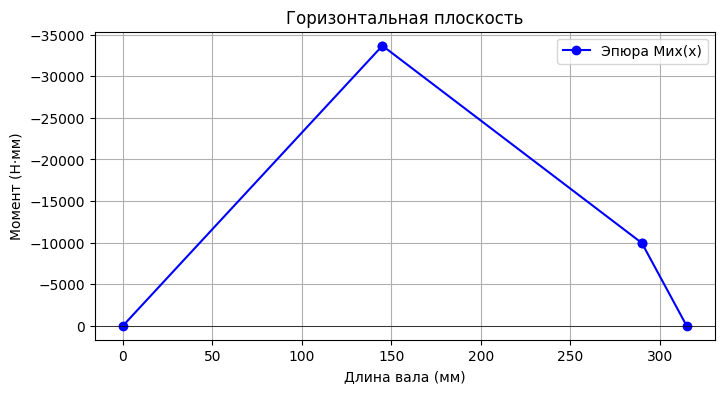

In [875]:
x, M = resultX

plt.figure(figsize=(8, 4))
plt.plot(x, M, marker='o', linestyle='-', color='blue', label='Эпюра Mиx(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Длина вала (мм)')
plt.ylabel('Момент (Н·мм)')
plt.title('Горизонтальная плоскость')
plt.grid(True)
plt.legend()

# Инвертируем ось Y
plt.gca().invert_yaxis()
plt.show()